**Importação de bibliotecas para a manipulação dos dados.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Abrindo o arquivo excel para a leitura dos dados e verificação dos seus tipos.**

In [ ]:
df = pd.read_excel('LL Report - Abril, Maio e Junho 2020.xlsx')
df.info()

#O índice do lado esquerdo de é posto pela própria linguagem utilizada, e não interfere em nenhuma ocasião de qualquer análise realizada. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12852 entries, 0 to 12851
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   NOME               12852 non-null  object        
 1   DATA               12852 non-null  datetime64[ns]
 2   PEDIDO             12852 non-null  object        
 3   PRODUTO            12852 non-null  object        
 4   SKU                12852 non-null  object        
 5   QUANTIDADE         12217 non-null  float64       
 6   PREÇO UNITÁRIO     12217 non-null  float64       
 7   ESTADO             12168 non-null  object        
 8   FRETE              11167 non-null  float64       
 9   TOTAL DE PRODUTOS  12217 non-null  float64       
 10  SUBTOTAL           10883 non-null  float64       
 11  MARCA              12852 non-null  object        
 12  CANAL DE VENDA     12852 non-null  object        
 13  STATUS DO PEDIDO   12852 non-null  object        
dtypes: dat

**Convertendo a coluna "MÊS" para o formato de Data.**

In [ ]:
df['MÊS'] = pd.to_datetime(df['DATA']).dt.to_period('M')
df.head()

#O índice do lado esquerdo de cada pivot (tabela) é posto pela própria linguagem utilizada, e não interfere em nenhuma ocasião de qualquer análise realizada. 

,NOME,DATA,PEDIDO,PRODUTO,SKU,QUANTIDADE,PREÇO UNITÁRIO,ESTADO,FRETE,TOTAL DE PRODUTOS,SUBTOTAL,MARCA,CANAL DE VENDA,STATUS DO PEDIDO,MÊS
0,VICENTE,2020-06-30,5E260B09,CRISTALIUM TITAN TAÇA GIN BORGONHA 600 ML C/6,VT-tokstok-392059,1.0,54.703833,RJ,0.0,54.703833,54.703833,TOK&STOK,Canal Kappa,APROVADO,2020-06
1,MARIA,2020-06-30,60F143FD,CREATE JOGO DE UTENSÍLIOS 11PÇS,VT-tokstok-308180,1.0,43.753111,MG,0.0,43.753111,43.753111,TOK&STOK,Canal Kappa,APROVADO,2020-06
2,EDUARDO,2020-06-30,89118625,ABSOLUT VODKA EXTRAKT SUECA - 750ML,7312040551798,1.0,44.748631,SP,0.0,44.748631,44.748631,ABSOLUT,Canal Kappa,APROVADO,2020-06
3,RAPHAEL,2020-06-30,0D2FDCCD,MAISON L’AVENIR PINOTAGE - 2016,VT-worldwine-706,1.0,68.193131,RJ,0.0,68.193131,68.193131,WORLD WINE,Canal Kappa,APROVADO,2020-06
4,RAPHAEL,2020-06-30,DED0F978,VALDERIZ VALDEHERMOSO 9 MESES - 2016,VT-worldwine-855,1.0,68.193131,RJ,0.0,68.193131,68.193131,WORLD WINE,Canal Kappa,APROVADO,2020-06


**Quantidade de ordens (pedidos) por "Canal de Venda", sejam elas com status tanto positivo quanto negativo. 
É possível ver que o canal "Canal Kappa" possui uma estratégia melhor de venda com relação aos demais canais.**

In [ ]:
df['CANAL DE VENDA'].value_counts()

Canal Kappa     7823
Canal Gama      2626
Canal Delta     1890
Canal Ômega      194
Canal Alfa       130
Canal Lambda     102
Canal Zeta        87
Name: CANAL DE VENDA, dtype: int64

**A partir da contagem de ordens, fora criado um pivot de acordo com a mesma e separados de acordo com cada um dos dos canais de venda que mais obtiveram  pedidos. Colocando o "Status do Pedido" como parâmetro para que, assim, o pivot seja filtrado para retornar apenas a contagem de pedidos que foram aprovados.**
- O Canal Kappa teve uma diminuição no número de pedidos, mas ainda assim permaneceu com a maior quantidade.

In [ ]:
piv_df_count_cv = pd.pivot_table(df[df['STATUS DO PEDIDO'] == 'APROVADO'], 
                                 values='PEDIDO', 
                                 index=['CANAL DE VENDA'], 
                                 aggfunc='count').reset_index().sort_values(by='PEDIDO', ascending=False)
qtde_canal_vendas = piv_df_count_cv.head() 
qtde_canal_vendas

#O índice do lado esquerdo de cada pivot (tabela) é posto pela própria linguagem utilizada, e não interfere em nenhuma ocasião de qualquer análise realizada. 

,CANAL DE VENDA,PEDIDO
3,Canal Kappa,7639
2,Canal Gama,2411
1,Canal Delta,1520
6,Canal Ômega,179
4,Canal Lambda,74


**Em seguida, é possível gerarmos um gráfico de barras vertical para termos uma visualização mais ampla da situação.**

[Text(0, 0.5, 'QUANTIDADE DE PEDIDOS'),
 Text(0.5, 0, 'CANAIS DE VENDA'),
 Text(0.5, 1.0, 'Pedidos por Canal de Venda')]

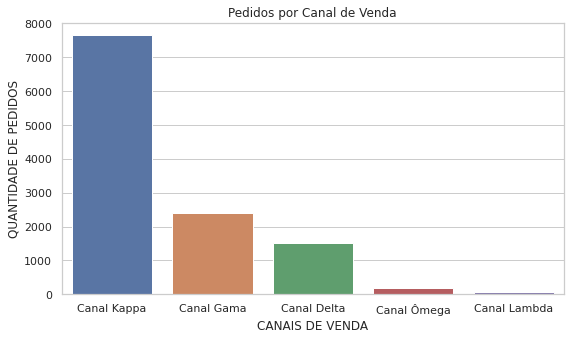

In [ ]:
plt.figure(figsize=(9,5))
piv_df_count_cv_bar = sns.barplot(x='CANAL DE VENDA', y='PEDIDO', data=qtde_canal_vendas)
piv_df_count_cv_bar.set(xlabel='CANAIS DE VENDA', ylabel='QUANTIDADE DE PEDIDOS', title='Pedidos por Canal de Venda')

**Quantidade de ordens (pedidos) por marca. É possível ver que a marca mais vendida entre todas é a "World Wine".**

In [ ]:
df['MARCA'].value_counts()

WORLD WINE          2727
TOK&STOK            1777
ABSOLUT              989
GAMAITALY            934
TROUSSEAU            738
                    ... 
EDITORA SEXTANTE       1
OBJETIVA               1
FUJIFILM               1
BERTRAND BRASIL        1
BEATS                  1
Name: MARCA, Length: 229, dtype: int64

**Criação de pivot para a quantidade de ordens por cada marca, que obtivera o pedido como status de "aprovado".**

In [ ]:
piv_ordens_marca = pd.pivot_table(df[df['STATUS DO PEDIDO'] == 'APROVADO'],
                                  values='PEDIDO', 
                                  index=['MARCA'], 
                                  aggfunc='count').reset_index().sort_values(by='PEDIDO', ascending=False)
qtde_ordens_marca = piv_ordens_marca.head()

**Por conseguinte, a criação do gráfico com as 5 marcas que mais obtiveram pedidos aprovados.**

[Text(0, 0.5, 'QUANTIDADE DE PEDIDOS'),
 Text(0.5, 0, 'MARCAS'),
 Text(0.5, 1.0, 'Pedidos por Marca')]

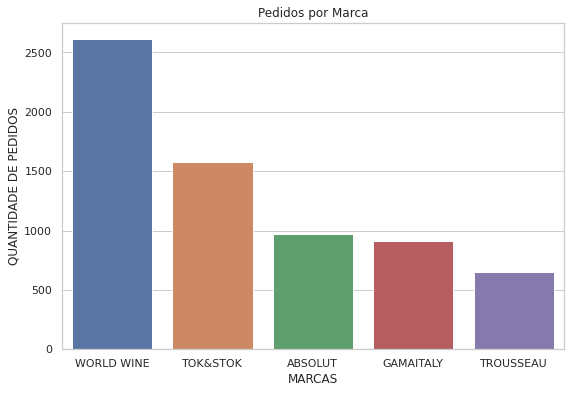

In [ ]:
plt.figure(figsize=(9,6))
sns.set(style='whitegrid')
piv_df_count_cv_bar = sns.barplot(x='MARCA', y='PEDIDO', data=qtde_ordens_marca)
piv_df_count_cv_bar.set(xlabel='MARCAS', ylabel='QUANTIDADE DE PEDIDOS', title='Pedidos por Marca')

**Acrescentando uma coluna e convertendo-o para datetime para uma versão de apenas ano-mês, para facilicar a visualização e a manipulação.**

In [ ]:
df['MÊS'] = pd.to_datetime(df['DATA']).dt.to_period('M')
df.head()

#O índice do lado esquerdo de cada pivot (tabela) é posto pela própria linguagem utilizada, e não interfere em nenhuma ocasião de qualquer análise realizada. 

,NOME,DATA,PEDIDO,PRODUTO,SKU,QUANTIDADE,PREÇO UNITÁRIO,ESTADO,FRETE,TOTAL DE PRODUTOS,SUBTOTAL,MARCA,CANAL DE VENDA,STATUS DO PEDIDO,MÊS
0,VICENTE,2020-06-30,5E260B09,CRISTALIUM TITAN TAÇA GIN BORGONHA 600 ML C/6,VT-tokstok-392059,1.0,54.703833,RJ,0.0,54.703833,54.703833,TOK&STOK,Canal Kappa,APROVADO,2020-06
1,MARIA,2020-06-30,60F143FD,CREATE JOGO DE UTENSÍLIOS 11PÇS,VT-tokstok-308180,1.0,43.753111,MG,0.0,43.753111,43.753111,TOK&STOK,Canal Kappa,APROVADO,2020-06
2,EDUARDO,2020-06-30,89118625,ABSOLUT VODKA EXTRAKT SUECA - 750ML,7312040551798,1.0,44.748631,SP,0.0,44.748631,44.748631,ABSOLUT,Canal Kappa,APROVADO,2020-06
3,RAPHAEL,2020-06-30,0D2FDCCD,MAISON L’AVENIR PINOTAGE - 2016,VT-worldwine-706,1.0,68.193131,RJ,0.0,68.193131,68.193131,WORLD WINE,Canal Kappa,APROVADO,2020-06
4,RAPHAEL,2020-06-30,DED0F978,VALDERIZ VALDEHERMOSO 9 MESES - 2016,VT-worldwine-855,1.0,68.193131,RJ,0.0,68.193131,68.193131,WORLD WINE,Canal Kappa,APROVADO,2020-06


**Cria-se um pivot para analisar os dados conforme a quantidade de pedidos, e através deste, gerar um gráfico de linhas para se analisar a tendência destes canais durante esses três meses em questão.**

In [ ]:
piv_df = pd.pivot_table(df, 
                        values='PEDIDO', 
                        index=['MÊS', 'CANAL DE VENDA'], 
                        aggfunc='count').reset_index()
piv_df.head()

#O índice do lado esquerdo de cada pivot (tabela) é posto pela própria linguagem utilizada, e não interfere em nenhuma ocasião de qualquer análise realizada. 

,MÊS,CANAL DE VENDA,PEDIDO
0,2020-04,Canal Alfa,4
1,2020-04,Canal Delta,682
2,2020-04,Canal Gama,818
3,2020-04,Canal Kappa,1555
4,2020-04,Canal Lambda,54


**Após a criação do pivot, utilizamo-os para gerar um gráfico de linhas com base na quantidade total de pedidos (tanto aprovados, quanto não aprovados - mas é possível altera-lo apenas para aprovados) por Canal de Venda em cada mês. Os marcadores mostram o total de cada um destes.**

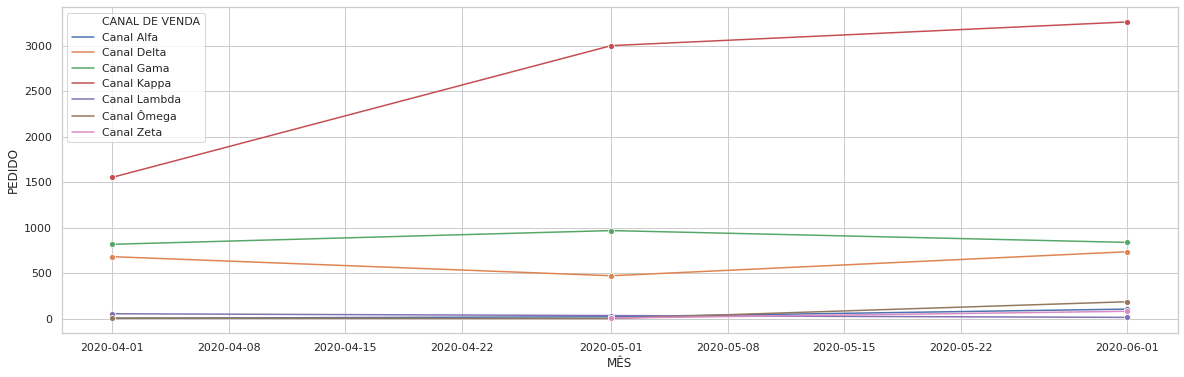

In [ ]:
plt.figure(figsize=(20,6))
sns.set(style='whitegrid')
sns.lineplot(x='MÊS', y='PEDIDO', hue='CANAL DE VENDA', data=piv_df, marker='o', scalex=False, scaley=False)

**Valor médio do frete de acordo com cada estado.**


In [ ]:
piv_df_mean_frete_uf = pd.pivot_table(df[df.FRETE != 0],
                            values='FRETE',
                            index='ESTADO',
                            aggfunc='mean').reset_index().sort_values(by='FRETE', ascending=False)
piv_df_mean_frete_uf

#O índice do lado esquerdo de cada pivot (tabela) é posto pela própria linguagem utilizada, e não interfere em nenhuma ocasião de qualquer análise realizada. 

,ESTADO,FRETE
14,PI,6.620209
23,SP,7.802058
22,SE,8.405177
7,MA,9.015502
15,PR,9.544086
4,DF,9.797728
21,SC,10.397298
20,RS,10.708287
0,AL,10.952381
8,MG,11.016208


**Neste, segue-se o GMV (Gross Merchandise Volume - Volume Bruto de Mercadorias). Ou seja, a soma do preço unitário de cada produto com o valor do frete. Filtrado por marca. (As 5 marcas que obtiveram os maiores valores em subtotal).**

In [ ]:
piv_df_gmv = pd.pivot_table(df,
                            values=['SUBTOTAL'],
                            index='MARCA',
                            aggfunc='sum').reset_index().sort_values(by='SUBTOTAL', ascending=False)
piv_df_gmv.head() 

#O índice do lado esquerdo de cada pivot (tabela) é posto pela própria linguagem utilizada, e não interfere em nenhuma ocasião de qualquer análise realizada. 

,MARCA,SUBTOTAL
222,WORLD WINE,171018.899950
189,SEKURO,149328.023892
200,TOK&STOK,98221.299154
204,TROUSSEAU,78721.333997
82,GAMAITALY,69267.307118


**Nesta, fora criado um pivot para que pudessemos ter uma noção do total de quantos produtos foram vendidos de acordo com cada SKU's - É possível alterar parar que todos as demais SKU's sejam vistas também.** 

In [ ]:
piv_df_sku = pd.pivot_table(df,
                            values=['QUANTIDADE'],
                            index='SKU',
                            aggfunc='sum').reset_index().sort_values(by='QUANTIDADE', ascending=False)
piv_df_sku.head()

#O índice do lado esquerdo de cada pivô é posto pela própria linguagem utilizada, e não interfere em nenhuma ocasião de qualquer análise realizada. 

,SKU,QUANTIDADE
480,DoacaoalcoolgelC6,1006.0
46,7312040017034,304.0
7,080432400432,300.0
141,C6anuidadeCarbon,235.0
37,5010106111925,200.0


**Da mesma forma que o anterior, todavia com uma diferença, este apresenta as maiores quantidades de vendas por produto.**

In [ ]:
piv_df_vendas_pedido['MÊS'] = pd.to_datetime(df['DATA']).dt.to_period('M')

In [ ]:
piv_df_vendas_pedido = pd.pivot_table(df[df['STATUS DO PEDIDO'] == 'APROVADO'],
                            values=['QUANTIDADE'],
                            index=['PRODUTO'],
                            aggfunc='sum').reset_index().sort_values(by='QUANTIDADE', ascending=False)
piv_df_vendas_pedido.head()

#O índice do lado esquerdo de cada pivot (tabela) é posto pela própria linguagem utilizada, e não interfere em nenhuma ocasião de qualquer análise realizada. 

,PRODUTO,QUANTIDADE
681,DOAÇÃO DE ÁLCOOL GEL 175G,996.0
26,ABSOLUT VODKA ORIGINAL SUECA - 1L,297.0
499,CHIVAS REGAL WHISKY 12 ANOS ESCOCÊS - 1L,286.0
1628,PARCELA DA ANUIDADE CARTÃO C6 CARBON MASTERCAR...,235.0
2188,WYBOROWA VODKA POLONESA - 750ML,198.0


**De acordo com a análise anterior, pudemos observar que o produto que obteve uma maior quantidade de vendas foi o "DOAÇÃO DE ÁLCOOL GEL 175G". Com isso, criei um pivot (tabela) especificando o *álcool gel* para realizar uma breve análise sobre ele durante os meses.**

In [ ]:
piv_df_vendas_pedido = pd.pivot_table(
                                      df[df['PRODUTO'] == 'DOAÇÃO DE ÁLCOOL GEL 175G'],
                            values=['QUANTIDADE'],
                            index=['MÊS', 'PRODUTO'],
                            aggfunc='sum').reset_index().sort_values(by='QUANTIDADE', ascending=False)
piv_df_vendas_pedido.head()

#O índice do lado esquerdo de cada pivô é posto pela própria linguagem utilizada, e não interfere em nenhuma ocasião de qualquer análise realizada. 

,MÊS,PRODUTO,QUANTIDADE
0,2020-04,DOAÇÃO DE ÁLCOOL GEL 175G,617.0
1,2020-05,DOAÇÃO DE ÁLCOOL GEL 175G,389.0


**É preciso converter o tipo de dado do campo (coluna) "mês" para que o gráfico seja construído.**

In [ ]:
piv_df_vendas_pedido['MÊS'] = piv_df_vendas_pedido.MÊS.values.astype('datetime64[M]')

**Criação do gráfico com base no produto mais vendido, de acordo com o total de vendas. Porém, separado por cada mês para que possamos analisar sua tendência. 
Conforme os marcadores no gráfico, este produto teve suas vendas apenas no mês de abril (2020-04) e maio (2020-05), tendo uma queda em sua performance de *36,95%* de abril para maio, e um total de zero vendas no mês seguinte.**

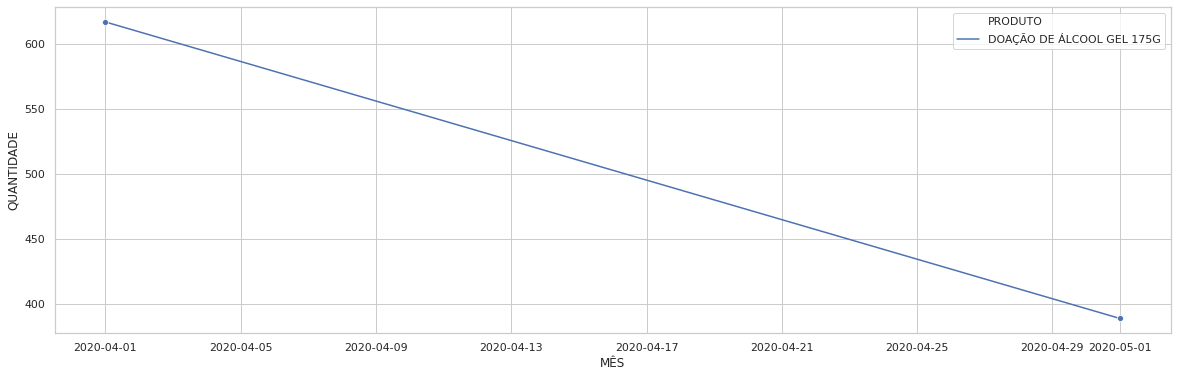

In [ ]:
plt.figure(figsize=(20,6))
sns.set(style='whitegrid')
sns.lineplot(x='MÊS', y='QUANTIDADE', hue='PRODUTO', data=piv_df_vendas_pedido, marker='o', scalex=False, scaley=False)

TODO:
- Vendas por marca (OK)
- Vendas por canal (OK)
- Tendência de vendas por canal (OK)
- Frete médio por estado (OK)
- GMV (Gross Merchandise Volume - Volume Bruto de Mercadorias) (preço + frete) por marca. (OK)
- SKUs vendidos por marca. (OK)
- Quantidade de vendas por item. (OK)
- Tendência do produto mais vendido por mês. (OK).